   ##                    Preprocessing Of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [6]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
data=data.drop(['date','street','statezip','country'],axis=1)

In [8]:
#data=data.drop(['waterfront'],axis=1)

In [9]:
#data['city']=pd.factorize(data['city'])[0]

In [8]:
from sklearn.decomposition import PCA
X = pd.get_dummies(data.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data['city_pca1'] = X_pca[:, 0]
data['city_pca2'] = X_pca[:, 1]

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [9]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
city_pca1        0
city_pca2        0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  city_pca1      4600 non-null   float64
 15  city_pca2      4600 non-null   float64
dtypes: float64(6), int64(9), object(1)
memory usage: 575.1+ KB


In [11]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'city_pca1', 'city_pca2'],
      dtype='object')

In [12]:
data.shape

(4600, 16)

In [13]:
data['bedrooms']  = data['bedrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   int64  
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  city_pca1      4600 non-null   float64
 15  city_pca2      4600 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory usage: 575.1+ KB


## Exploratory Data Analysis

#### How Price is Distributed

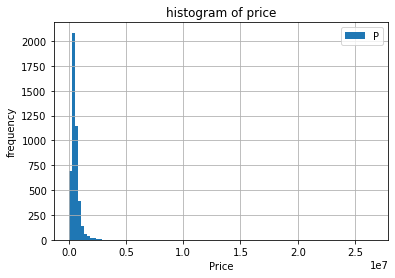

In [15]:
data['price'].hist(bins=100)
plt.xlabel("Price")
plt.ylabel("frequency")
plt.title("histogram of price")
plt.legend("Price")
plt.show()

### Removing rows based on outliers

In [16]:
(data['price'] > 0.3e7).sum()

9

In [19]:
#Q1 = data['price'].quantile(0.25)
#Q3 = data['price'].quantile(0.75)
#IQR = Q3 - Q1


In [20]:
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR


In [21]:
#outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]


In [17]:
data = data[~(data['price'] > 0.3e7)]

#### Distribution of price after removel of outliers

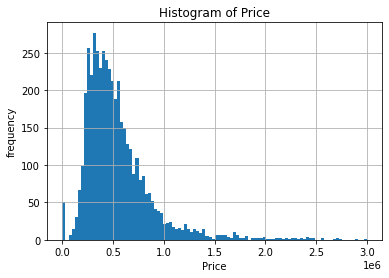

In [18]:
data['price'].hist(bins=100)
plt.xlabel('Price')
plt.ylabel('frequency')
plt.title('Histogram of Price')
plt.show()

In [19]:
bedrooms=data['bedrooms'].value_counts()
bedrooms

3    2030
4    1529
2     566
5     350
6      60
1      38
7      13
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [20]:
floors=data['floors'].value_counts()
floors

1    2614
2    1848
3     129
Name: floors, dtype: int64

In [21]:
(data['price']==0).sum()

49

In [22]:
data['price'].replace(0,np.nan,inplace=True)      #replacing 0's with nan

In [23]:
data.dropna(inplace=True)

In [24]:
#data['price'].fillna(value=data['price'].mean(),inplace=True)

In [25]:
#(data['waterfront']==0).sum()

In [26]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'city_pca1', 'city_pca2'],
      dtype='object')

In [24]:
duplicates = data[data.duplicated()]
duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_pca1,city_pca2


In [25]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
count,4.542000e+03,4542.000000,4542.000000,4542.000000,4.542000e+03,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000
mean,5.437057e+05,3.392118,2.151255,2124.428886,1.482228e+04,1.458829,0.006165,0.231616,3.448921,1817.153457,307.275429,1970.790841,808.402466,0.001219,0.000740
std,3.343186e+05,0.902008,0.769943,931.881656,3.599441e+04,0.552028,0.078282,0.760211,0.675107,843.027175,453.452628,29.759690,979.383266,0.488016,0.250880
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,-0.405058,-0.635346
25%,3.260000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,-0.357669,-0.021390
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.672500e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,-0.318007,-0.010134
75%,6.554438e+05,4.000000,2.500000,2610.000000,1.092675e+04,2.000000,0.000000,0.000000,4.000000,2297.500000,600.000000,1997.000000,1999.000000,0.675179,0.001898
max,3.000000e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4130.000000,2014.000000,2014.000000,0.675179,0.768967


In [26]:
data.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_pca1,city_pca2
0,3.130000e+05,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,-0.334071,-0.014475
1,2.384000e+06,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,0.675179,0.001898
2,3.420000e+05,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent,-0.356881,-0.023194
3,4.200000e+05,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,-0.401545,-0.635346
4,5.500000e+05,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,-0.377678,-0.044400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,Seattle,0.675179,0.001898
4596,5.343333e+05,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,Bellevue,-0.401545,-0.635346
4597,4.169042e+05,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,Renton,-0.405058,0.768967
4598,2.034000e+05,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,Seattle,0.675179,0.001898


In [27]:
data['price'].min()

7800.0

In [28]:
data['price'].max()

3000000.0

In [29]:
data['price'].mean()

543705.690659794

<AxesSubplot:xlabel='floors', ylabel='price'>

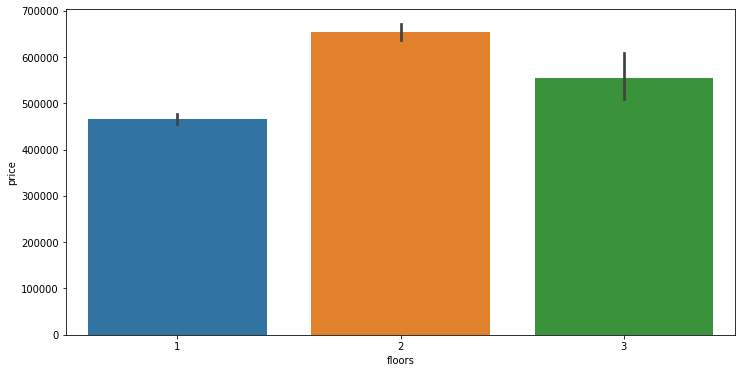

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['floors'],y=data['price'])

In [31]:
from scipy import stats

### With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.

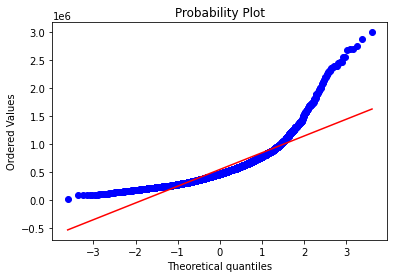

In [32]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

### As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed

In [33]:
data['price'] = np.log1p(data['price'])

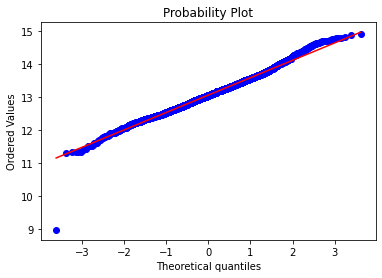

In [34]:
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

C:\Users\ubaid\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

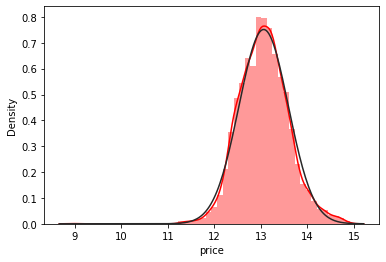

In [35]:
sns.distplot(data['price'],color="red",kde=True,fit=stats.norm)

In [45]:
corr=data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
price,1.000000,0.354535,0.546452,0.670317,0.086480,0.279441,0.124513,0.318396,0.058392,0.579586,0.300032,0.059694,-0.065820,0.091964,-0.240901
bedrooms,0.354535,1.000000,0.544793,0.597365,0.070888,0.152945,-0.015529,0.107100,0.020783,0.482455,0.330687,0.143257,-0.062425,-0.183864,-0.056574
bathrooms,0.546452,0.544793,1.000000,0.754789,0.109137,0.505442,0.041158,0.193432,-0.123564,0.684663,0.278276,0.469220,-0.222603,-0.184699,-0.071504
sqft_living,0.670317,0.597365,0.754789,1.000000,0.216472,0.343512,0.068646,0.294722,-0.065742,0.874157,0.429909,0.292820,-0.127802,-0.236730,-0.097073
sqft_lot,0.086480,0.070888,0.109137,0.216472,1.000000,-0.005216,0.016426,0.072312,0.000961,0.220485,0.034958,0.049108,-0.021360,-0.185925,-0.003377
floors,0.279441,0.152945,0.505442,0.343512,-0.005216,1.000000,0.010971,0.019580,-0.307004,0.519222,-0.259355,0.562422,-0.248269,-0.037950,0.020589
waterfront,0.124513,-0.015529,0.041158,0.068646,0.016426,0.010971,1.000000,0.342346,0.010126,0.047046,0.053609,-0.031397,0.009530,-0.030168,-0.011326
view,0.318396,0.107100,0.193432,0.294722,0.072312,0.019580,0.342346,1.000000,0.061245,0.162630,0.303327,-0.067378,0.025207,0.058365,-0.056468
condition,0.058392,0.020783,-0.123564,-0.065742,0.000961,-0.307004,0.010126,0.061245,1.000000,-0.180251,0.200005,-0.399214,-0.183811,0.073403,-0.034452
sqft_above,0.579586,0.482455,0.684663,0.874157,0.220485,0.519222,0.047046,0.162630,-0.180251,1.000000,-0.062666,0.413040,-0.164754,-0.329063,-0.053375


<AxesSubplot:>

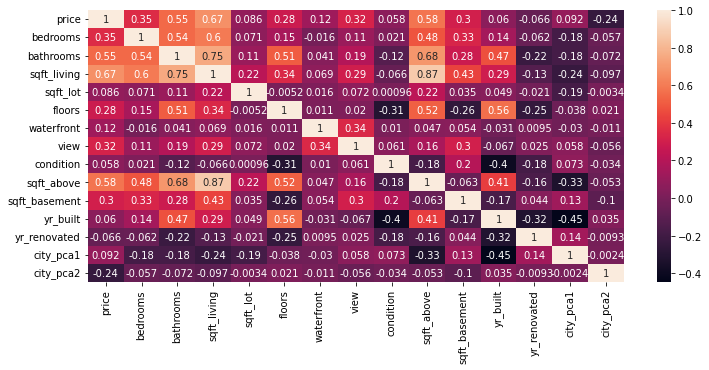

In [46]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

(array([ 79., 111.,  79.,  95., 171.,  92.,  38., 191., 189., 262., 252.,
        274., 281., 152., 365., 224., 359., 223., 353., 484., 268.]),
 array([1900.        , 1905.42857143, 1910.85714286, 1916.28571429,
        1921.71428571, 1927.14285714, 1932.57142857, 1938.        ,
        1943.42857143, 1948.85714286, 1954.28571429, 1959.71428571,
        1965.14285714, 1970.57142857, 1976.        , 1981.42857143,
        1986.85714286, 1992.28571429, 1997.71428571, 2003.14285714,
        2008.57142857, 2014.        ]),
 <BarContainer object of 21 artists>)

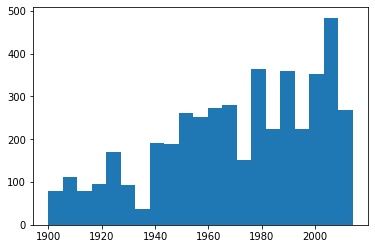

In [47]:
plt.hist(data['yr_built'],bins='auto',linewidth=0.5)

In [304]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.334071,-0.014475
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.675179,0.001898
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.356881,-0.023194
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401545,-0.635346
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.377678,-0.044400


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'city_pca1'}>,
        <AxesSubplot:title={'center':'city_pca2'}>, <AxesSubplot:>]],
      dtype=object)

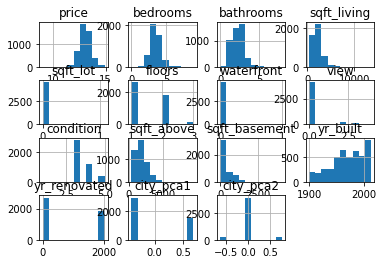

In [49]:
data.hist()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city           4542 non-null   object 
 14  city_pca1      4542 non-null   float64
 15  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory usage: 732.3+ KB


In [36]:
data=data.drop(['city'],axis=1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city_pca1      4542 non-null   float64
 14  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 696.8 KB


In [54]:
data.to_csv('out1.csv', index=False)

In [244]:
import pandas as pd
from scipy import stats

# Assuming 'your_data' is a DataFrame with the specified features
# Set the threshold value based on your preference, e.g., 2 or 3
def remove_outliers(data, threshold=2):
    z_scores = np.abs(stats.zscore(data))
    filtered_data = data[(z_scores < threshold).all(axis=1)]
    return filtered_data

# Example usage:
# Assuming 'your_data' is a DataFrame with columns: 'bedrooms', 'bathrooms', ..., 'city_pca2'
# Set the threshold value based on your preference, e.g., 2 or 3
filtered_data = remove_outliers(data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                                           'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
                                           'yr_built', 'yr_renovated', 'city_pca1', 'city_pca2']], threshold=3)

# 'filtered_data' now contains the data with outliers removed


In [38]:
from sklearn.linear_model import Lasso

In [230]:
X=data.drop(['price'],axis=1)
y=data['price']

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [296]:
lasso= Lasso(alpha=0.2562)

In [297]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.2562, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [298]:
y_pred = lasso.predict(X_test)

In [299]:
lasso.score(X_train,y_train)

0.48934873513239274

In [300]:
lasso.score(X_test,y_test)

0.4177932642449844

In [301]:
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

In [305]:
from sklearn.metrics import mean_squared_error

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)


Mean Squared Error:  0.16006645048999335


In [308]:
from sklearn.metrics import mean_absolute_error

# Calculate and print the mean squared error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  0.3146102390555487


In [303]:
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.4000830544899313


In [286]:
from sklearn.metrics import r2_score

# Assuming Y_test and Y_pred are the true target values and predicted values, respectively
r_squared = r2_score(y_test, y_pred)

print('R-squared:', r_squared)

R-squared: 0.3915640160456052


In [287]:
mse = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.3886905268136178


In [242]:
from sklearn.metrics import mean_squared_error

# Calculate and print the mean squared error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: ', mse)


Mean Squared Error:  0.14530101110990512


In [243]:
from sklearn.metrics import r2_score

# Assuming Y_test and Y_pred are the true target values and predicted values, respectively
r_squared = r2_score(y_train, y_train_pred)

print('R-squared:', r_squared)


R-squared: 0.48742335067594367


In [39]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.334071,-0.014633
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.675179,0.001898
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.356881,-0.023225
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401545,-0.635346
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.377678,-0.044411


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def process_weighted_X_train(X_train, adaptive_weights):
    # Manually apply sample weights to the input features
    weighted_X_train = X_train * adaptive_weights

    # Replace infinite values with the mean of non-infinite values
    non_inf_values = weighted_X_train[~np.isinf(weighted_X_train)]
    mean_value = np.mean(non_inf_values)
    weighted_X_train[np.isinf(weighted_X_train)] = mean_value

    return weighted_X_train

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('out1.csv')

# Assume 'Price' is the target variable, and drop non-numeric columns for simplicity
X = data.drop(['price'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Continue with the Adaptive Lasso modeling
alphas = np.logspace(-5, 1, 100)

# Define the hyperparameter grid for grid search
param_grid = {'alpha': alphas}

# Initialize GridSearchCV
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=10)  # You can adjust the number of folds in cross-validation (cv)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Calculate Feature Importance (using coefficients in this case)
feature_importance = np.abs(grid_search.best_estimator_.coef_)

# Adapt the Penalty (calculate adaptive weights)
adaptive_weights = 1 / (2 * feature_importance)

# Use the function to process weighted_X_train
weighted_X_train = process_weighted_X_train(X_train_scaled, adaptive_weights)

# Fit the Adaptive Lasso Model with the best alpha
adaptive_lasso_model = Lasso(alpha=best_alpha, positive=True)
adaptive_lasso_model.fit(weighted_X_train, y_train)

# Predictions
y_train_pred = adaptive_lasso_model.predict(X_train_scaled)
y_test_pred = adaptive_lasso_model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Best Alpha: {best_alpha}')
print(f'Training MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, RMSE: {train_rmse:.2f}, R-squared: {train_r2:.2f}')
print(f'Testing MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, RMSE: {test_rmse:.2f}, R-squared: {test_r2:.2f}')

# Extract Selected Features
selected_features = X.columns[adaptive_lasso_model.coef_ != 0]
print('Selected Features:', selected_features)

Best Alpha: 0.00014174741629268049
Training MSE: 0.20, MAE: 0.35, RMSE: 0.44, R-squared: 0.31
Testing MSE: 0.19, MAE: 0.34, RMSE: 0.43, R-squared: 0.32
Selected Features: Index(['bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'city_pca1'],
      dtype='object')


In [49]:
selected_features_df = pd.DataFrame(selected_features, columns=['Selected Features'])

In [50]:
selected_features_df.to_csv('outfeatures.csv', index=False)

In [71]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('out1.csv')

# Assume 'Price' is the target variable, and drop any non-numeric columns for simplicity
X = data.drop(['price'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Base Lasso Model
lasso_model = Lasso(alpha=0.1)  # You may need to tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Step 3: Calculate Feature Importance (using coefficients in this case)
feature_importance = np.abs(lasso_model.coef_)

# Step 4: Adapt the Penalty (calculate adaptive weights)
adaptive_weights = 1 / (2 * feature_importance)


weighted_X_train = X_train_scaled * adaptive_weights
# Step 5: Fit the Adaptive Lasso Model
adaptive_lasso_model = Lasso(alpha=0.1, positive=True)  # Setting positive=True enforces non-negative coefficients
adaptive_lasso_model.fit(weighted_X_train, y_train)

# Step 7: Evaluate the model
train_score = adaptive_lasso_model.score(X_train_scaled, y_train)
test_score = adaptive_lasso_model.score(X_test_scaled, y_test)

print(f'Training R-squared: {train_score:.2f}')
print(f'Testing R-squared: {test_score:.2f}')

# Step 8: Extract Selected Features
selected_features = X.columns[adaptive_lasso_model.coef_ != 0]
print('Selected Features:', selected_features)


C:\Users\ubaid\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ubaid\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [60]:
data = pd.read_csv('out1.csv')

In [61]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,-0.334071,-0.014633
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,0.675179,0.001898
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,-0.356881,-0.023225
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,-0.401545,-0.635346
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,-0.377678,-0.044411


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city_pca1      4542 non-null   float64
 14  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 532.4 KB


In [67]:
data['bathrooms'].isnull().sum()

0

In [68]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [70]:
# Replace NaN values with the mean of the column
data = data.fillna(data.mean())


In [93]:
print(np.any(np.isnan(X_train_scaled)))
print(np.any(np.isinf(X_train_scaled)))


False
False


In [4]:
print(X_train.describe().T)


                count          mean           std          min          25%  \
bedrooms       3633.0      3.384806      0.899713     0.000000     3.000000   
bathrooms      3633.0      2.146435      0.760159     0.000000     1.750000   
sqft_living    3633.0   2113.641618    912.438877   370.000000  1450.000000   
sqft_lot       3633.0  14576.605285  36316.249284   638.000000  5000.000000   
floors         3633.0      1.458574      0.548831     1.000000     1.000000   
waterfront     3633.0      0.006331      0.079325     0.000000     0.000000   
view           3633.0      0.225709      0.752185     0.000000     0.000000   
condition      3633.0      3.443710      0.669246     1.000000     3.000000   
sqft_above     3633.0   1810.472062    829.347922   370.000000  1190.000000   
sqft_basement  3633.0    303.169557    449.395131     0.000000     0.000000   
yr_built       3633.0   1970.925681     29.650283  1900.000000  1951.000000   
yr_renovated   3633.0    802.051748    978.156823   

In [96]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
y_train = y_train.loc[X_train.index]


In [6]:
import pandas as pd

# Assuming your dataset is named 'data'
# Replace 'your_dataset.csv' with the actual file path if loading from a file
# data = pd.read_csv('your_dataset.csv')

# Define the threshold for each feature (you can adjust these based on your requirements)
bedrooms_threshold = 7
bathrooms_threshold = 4
sqft_living_threshold = 5000
sqft_lot_threshold = 50000
sqft_above_threshold = 4000
sqft_basement_threshold = 1000
yr_built_max = 2020  # Considering current year (replace with a suitable value)
yr_renovated_max = 2020  # Considering current year (replace with a suitable value)

# Filter the dataset to exclude rows with extreme values
filtered_data = data[
    (data['bedrooms'] <= bedrooms_threshold) &
    (data['bathrooms'] <= bathrooms_threshold) &
    (data['sqft_living'] <= sqft_living_threshold) &
    (data['sqft_lot'] <= sqft_lot_threshold) &
    (data['sqft_above'] <= sqft_above_threshold) &
    (data['sqft_basement'] <= sqft_basement_threshold) &
    (data['yr_built'] <= yr_built_max) &
    (data['yr_renovated'] <= yr_renovated_max)
]

# Display the shape of the filtered dataset
print("Original dataset shape:", data.shape)
print("Filtered dataset shape:", filtered_data.shape)


Original dataset shape: (4542, 15)
Filtered dataset shape: (3883, 15)


In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('out1.csv')

# Define threshold values for filtering extreme values
bedrooms_threshold = 7
bathrooms_threshold = 4
sqft_living_threshold = 5000
sqft_lot_threshold = 50000
sqft_above_threshold = 4000
sqft_basement_threshold = 1000
yr_built_max = 2020  # Considering current year (replace with a suitable value)
yr_renovated_max = 2020  # Considering current year (replace with a suitable value)

# Filter out extreme values
filtered_data = data[
    (data['bedrooms'] <= bedrooms_threshold) &
    (data['bathrooms'] <= bathrooms_threshold) &
    (data['sqft_living'] <= sqft_living_threshold) &
    (data['sqft_lot'] <= sqft_lot_threshold) &
    (data['sqft_above'] <= sqft_above_threshold) &
    (data['sqft_basement'] <= sqft_basement_threshold) &
    (data['yr_built'] <= yr_built_max) &
    (data['yr_renovated'] <= yr_renovated_max)
]

# Assume 'price' is the target variable
X = filtered_data.drop(['price'], axis=1)
y = filtered_data['price']

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Base Lasso Model
lasso_model = Lasso(alpha=0.1)  # You may need to tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Step 3: Calculate Feature Importance (using coefficients in this case)
feature_importance = np.abs(lasso_model.coef_)

# Step 4: Adapt the Penalty (calculate adaptive weights)
adaptive_weights = 1 / (2 * feature_importance)

# Step 5: Manually apply sample weights to the input features
weighted_X_train = X_train_scaled * adaptive_weights

# Step 6: Fit the Adaptive Lasso Model with the weighted features
adaptive_lasso_model = Lasso(alpha=0.1, positive=True)  # Setting positive=True enforces non-negative coefficients
adaptive_lasso_model.fit(weighted_X_train, y_train)

# Step 7: Evaluate the model
train_score = adaptive_lasso_model.score(X_train_scaled, y_train)
test_score = adaptive_lasso_model.score(X_test_scaled, y_test)

print(f'Training R-squared: {train_score:.2f}')
print(f'Testing R-squared: {test_score:.2f}')

# Step 8: Extract Selected Features
selected_features = X.columns[adaptive_lasso_model.coef_ != 0]
print('Selected Features:', selected_features)


C:\Users\ubaid\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ubaid\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('out1.csv')

# Handle missing values by replacing them with the mean
data = data.fillna(data.mean())

# Assume 'Price' is the target variable, and drop non-numeric columns for simplicity
X = data.drop(['price'], axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Continue with the Adaptive Lasso modeling as shown in the previous examples
lasso_model = Lasso(alpha=0.1)  # You may need to tune the alpha parameter
lasso_model.fit(X_train_scaled, y_train)

# Step 3: Calculate Feature Importance (using coefficients in this case)
feature_importance = np.abs(lasso_model.coef_)

# Step 4: Adapt the Penalty (calculate adaptive weights)
adaptive_weights = 1 / (2 * feature_importance)


weighted_X_train = X_train_scaled * adaptive_weights
# Step 5: Fit the Adaptive Lasso Model
adaptive_lasso_model = Lasso(alpha=0.1, positive=True)  # Setting positive=True enforces non-negative coefficients
adaptive_lasso_model.fit(weighted_X_train, y_train)

# Step 7: Evaluate the model
train_score = adaptive_lasso_model.score(X_train_scaled, y_train)
test_score = adaptive_lasso_model.score(X_test_scaled, y_test)

print(f'Training R-squared: {train_score:.2f}')
print(f'Testing R-squared: {test_score:.2f}')

# Step 8: Extract Selected Features
selected_features = X.columns[adaptive_lasso_model.coef_ != 0]
print('Selected Features:', selected_features)


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [2]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city_pca1', 'city_pca2'],
      dtype='object')

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('out1.csv')

# Assume 'price' is the target variable
X = data.drop(['price'], axis=1)
y = data['price']

# Use RobustScaler to handle outliers in a robust way
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Base Lasso Model
lasso_model = Lasso(alpha=0.1)  # You may need to tune the alpha parameter
lasso_model.fit(X_train, y_train)

# Step 3: Calculate Feature Importance (using coefficients in this case)
feature_importance = np.abs(lasso_model.coef_)

# Step 4: Adapt the Penalty (calculate adaptive weights)
adaptive_weights = 1 / (2 * feature_importance)

# Step 5: Manually apply sample weights to the input features
weighted_X_train = X_train * adaptive_weights

# Step 6: Fit the Adaptive Lasso Model with the weighted features
adaptive_lasso_model = Lasso(alpha=0.1, positive=True)  # Setting positive=True enforces non-negative coefficients
adaptive_lasso_model.fit(weighted_X_train, y_train)

# Step 7: Evaluate the model
train_score = adaptive_lasso_model.score(X_train, y_train)
test_score = adaptive_lasso_model.score(X_test, y_test)

print(f'Training R-squared: {train_score:.2f}')
print(f'Testing R-squared: {test_score:.2f}')

# Step 8: Extract Selected Features
selected_features = X.columns[adaptive_lasso_model.coef_ != 0]
print('Selected Features:', selected_features)


C:\Users\ubaid\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\ubaid\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in multiply
C:\Users\ubaid\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [9]:
data.isnull().values.any()

False

In [89]:
data['city_pca2'].isnull().values.any()

False

In [92]:
ds = data.isin([np.inf, -np.inf]).any() 
print(ds)

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
city_pca1        False
city_pca2        False
dtype: bool


In [90]:
data.isinf().values.any()

AttributeError: 'DataFrame' object has no attribute 'isinf'

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city_pca1      4542 non-null   float64
 14  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 532.4 KB


In [266]:
numeric_cols = list(data.select_dtypes(include=['int64', 'float64']).columns)
print(numeric_cols)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city_pca1', 'city_pca2']


In [12]:
import matplotlib.pyplot as plt

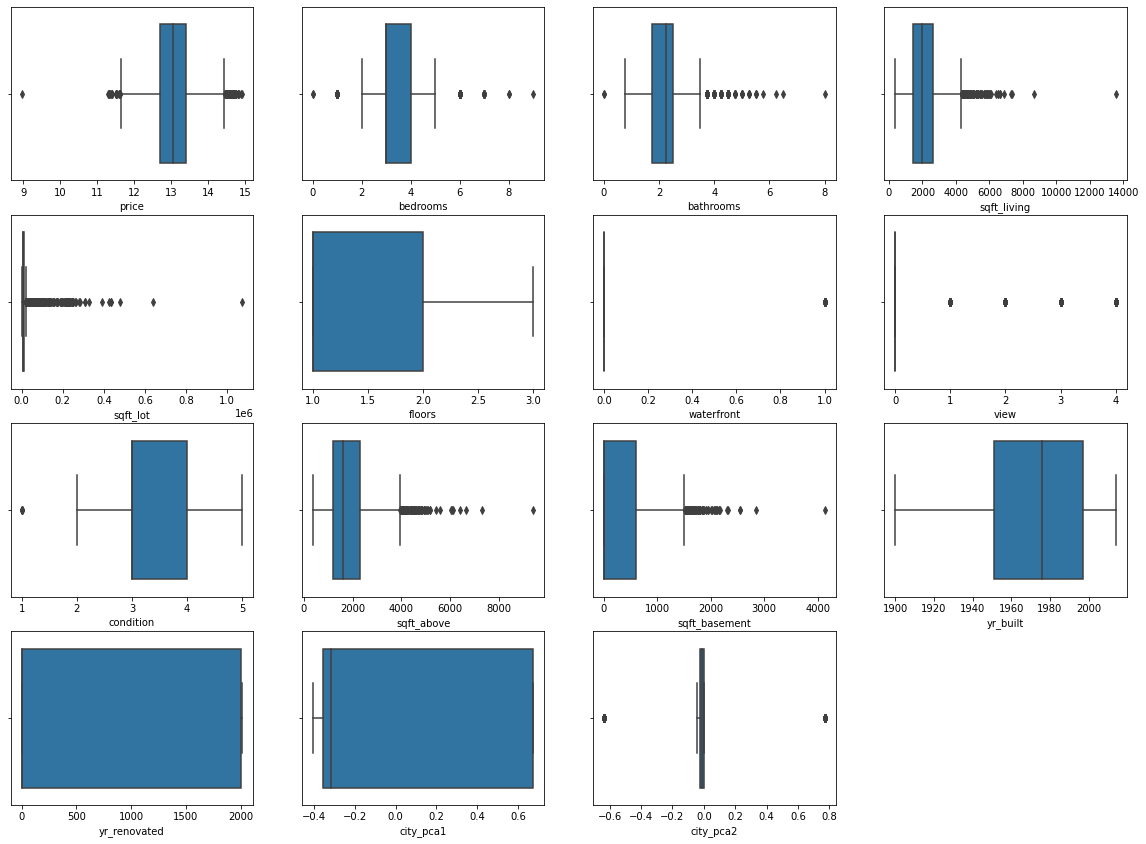

In [267]:
plt.figure(figsize=(20,30))
for i in enumerate(numeric_cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=data)

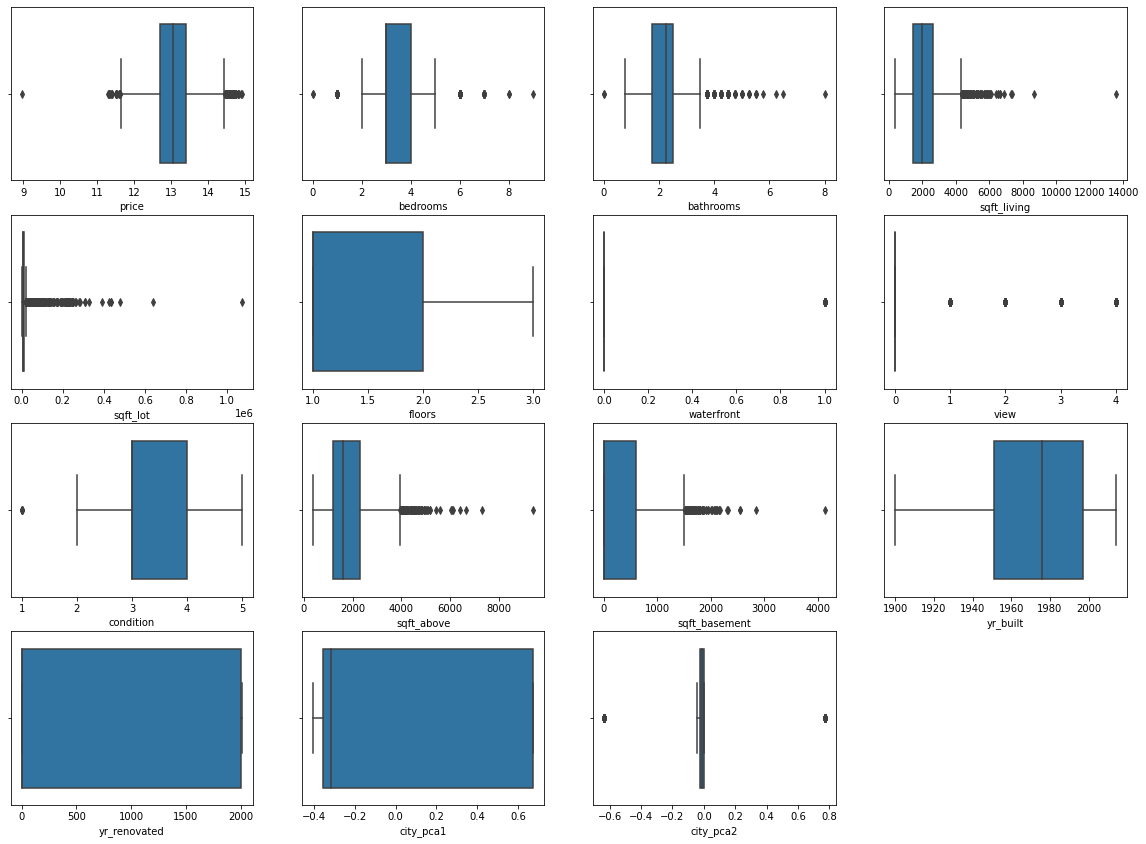

In [37]:
plt.figure(figsize=(20,30))
for i in enumerate(data):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=data)

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
outliers = data[(data < lower_bound) | (data > upper_bound)]

In [21]:
# Assuming 'your_data' is your DataFrame
# Replace 'your_data' with the actual name of your DataFrame

# Calculate the Z-scores for each data point
z_scores = np.abs((data - data.mean()) / data.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 4

# Identify outliers
outliers = data[z_scores > threshold]

# Count the number of outliers in each column
outlier_counts = (z_scores > threshold).sum()

# Display the number of outliers for each column
print("Number of outliers for each column:")
print(outlier_counts)


Number of outliers for each column:
price             1
bedrooms          3
bathrooms        11
sqft_living      17
sqft_lot         61
floors            0
waterfront       28
view             61
condition         0
sqft_above       10
sqft_basement     9
yr_built          0
yr_renovated      0
city_pca1         0
city_pca2         0
dtype: int64


In [23]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame
# Replace 'data' with the actual name of your DataFrame

# Calculate the Z-scores for each data point
z_scores = np.abs((data - data.mean()) / data.std())

# Define a threshold for outliers (e.g., Z-score > 3)
threshold = 3

# Identify and filter out the outliers
cleaned_data = data[(z_scores <= threshold).all(axis=1)]

# Now 'cleaned_data' contains your dataset with outliers removed


In [305]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to search over
alphas = [0.01, 0.1, 1.0, 10.0]  # Customize this list with your alpha candidates

# Create a parameter grid with the alpha values
param_grid = {'alpha': alphas}

# Create a grid search object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X, y)  # Replace X and y with your predictor and target variables

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Negate to get positive MSE

print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_mse}')


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

Best Alpha: 0.01
Best Mean Squared Error: 0.12344894857455924


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.56474387976687, tolerance: 0.1279768547119863
  positive)


In [306]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to search over (e.g., a logarithmic scale)
alphas = np.logspace(-6, 2, 100)

# Create a parameter grid with the alpha values
param_grid = {'alpha': alphas}

# Create a grid search object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X, y)  # Replace X and y with your predictor and target variables

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Negate to get positive MSE

print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_mse}')


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.1368305493501, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.89069121033415, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.20726097872247, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.90733640381268, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.2249190352152, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.30653373752403, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.27875242321417, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.36090404280318, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.01798437155497, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.52613991297596, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.1896245590179, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.36697514150725, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.84567402268823, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.71389871768795, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.08236946840503, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.3060505295438, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.7874021125408, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.89083808014732, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.07865994879234, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.19700496699463, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.01472937374524, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.44437219001867, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.33651159539485, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.61486918254127, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.8702049853353, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.12385773023524, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.08880522739975, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Best Alpha: 1.9630406500402726e-05
Best Mean Squared Error: 0.11938239828811746


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.86412858398373, tolerance: 0.1279768547119863
  positive)


In [194]:
model.score(X_test,y_test)

0.6560934773411753